<a href="https://colab.research.google.com/github/ricardodeazambuja/openimages/blob/main/Using_Open_Images_with_bbox_utils.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to use [OpenImages dataset](https://storage.googleapis.com/openimages/web/factsfigures.html)

* Open Images V6: approx. 9M images in total with labels, but only a subset with object bounding boxes, object segmentation masks, visual relationships, and localized narratives.
* Open Images Extended: 

It's possible to explore the dataset directly from its [new official website](https://storage.googleapis.com/openimages/web/index.html), but that only allows you to do things manually, therefore automation is needed!

You could just try [FiftyOne](https://voxel51.com/docs/fiftyone/tutorials/open_images.html), but I personally didn't like it and I prefer to use the [OpenImages website](https://storage.googleapis.com/openimages/web/index.html) and Python scripts.

https://storage.googleapis.com/openimages/web/download.html

* IsOccluded: Indicates that the object is occluded by another object in the image.
* IsTruncated: Indicates that the object extends beyond the boundary of the image.
* IsGroupOf: Indicates that the box spans a group of objects (e.g., a bed of flowers or a crowd of people). We asked annotators to use this tag for cases with more than 5 instances which are heavily occluding each other and are physically touching.
* IsDepiction: Indicates that the object is a depiction (e.g., a cartoon or drawing of the object, not a real physical instance).
* IsInside: Indicates a picture taken from the inside of the object (e.g., a car interior or inside of a building).


In [1]:
!wget -nc -q https://raw.githubusercontent.com/ricardodeazambuja/openimages/main/downloader.py
!wget -nc -q https://raw.githubusercontent.com/ricardodeazambuja/openimages/main/bbox_utils.py
!pip install -q boto3

     |████████████████████████████████| 131 kB 7.4 MB/s 
     |████████████████████████████████| 7.8 MB 47.0 MB/s 
     |████████████████████████████████| 79 kB 8.1 MB/s 
     |████████████████████████████████| 138 kB 65.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.6 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
from bbox_utils import bboxUtils

bu = bboxUtils()

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


class-descriptions-boxable.csv saved!
bbox_labels_600_hierarchy.json saved!
oidv6-relationship-triplets.csv saved!


In [3]:
bu.bbox_df

,Code,Label
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football
...,...,...
596,/m/0qmmr,Wheelchair
597,/m/0wdt60w,Rugby ball
598,/m/0xfy,Armadillo
599,/m/0xzly,Maracas


In [4]:
bu.search_by_name("cycle")

,Code,Label
39,/m/0199g,Bicycle
52,/m/01bqk0,Bicycle wheel
242,/m/03kt2w,Stationary bicycle
249,/m/03p3bw,Bicycle helmet
299,/m/04_sv,Motorcycle
505,/m/0f6nr,Unicycle


In [5]:
bu.code2label('/m/03p3bw')

'Bicycle helmet'

In [6]:
bu.label2code('Bicycle helmet')

'/m/03p3bw'

In [7]:
# Generates a dataframe with bboxes filtered by the list of codes
bboxes = bu.get_bboxes("train", ['/m/03p3bw'])
bboxes

oidv6-train-annotations-bbox.csv saved!
Searching for ['/m/03p3bw']...


,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
0,0002a06d31985d69,xclick,/m/03p3bw,1,0.086875,0.178125,0.110691,0.210974,0,0,0,0,0,0.111250,0.086875,0.178125,0.155000,0.110691,0.190161,0.192053,0.210974
1,0002a06d31985d69,xclick,/m/03p3bw,1,0.171250,0.284375,0.153264,0.364238,0,0,0,0,0,0.221250,0.171250,0.284375,0.235625,0.153264,0.244087,0.267739,0.364238
2,00082075a263df5b,xclick,/m/03p3bw,1,0.603333,0.731667,0.632500,0.718750,0,0,0,0,0,0.656667,0.603333,0.731667,0.700000,0.632500,0.680000,0.680000,0.718750
3,0008bfcd9ac38bca,xclick,/m/03p3bw,1,0.266340,0.415033,0.070261,0.207516,0,0,0,0,0,0.338235,0.266340,0.415033,0.356209,0.070261,0.187908,0.166667,0.207516
4,0011e258a21dd99f,xclick,/m/03p3bw,1,0.392969,0.422656,0.607268,0.636577,0,0,0,0,0,0.413281,0.392969,0.422656,0.409375,0.607268,0.630715,0.630715,0.636577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15947,ffcf345062895b19,xclick,/m/03p3bw,1,0.006875,0.029375,0.479167,0.501603,0,0,0,0,0,0.018750,0.006875,0.029375,0.029375,0.479167,0.496795,0.501603,0.501603
15948,ffcf345062895b19,xclick,/m/03p3bw,1,0.106250,0.136875,0.427885,0.462340,0,0,0,0,0,0.134375,0.106250,0.134375,0.136875,0.427885,0.427885,0.455128,0.462340
15949,ffcf345062895b19,xclick,/m/03p3bw,1,0.168125,0.188125,0.460737,0.477564,0,0,0,0,0,0.182500,0.168125,0.188125,0.188125,0.460737,0.472756,0.477564,0.477564
15950,ffcf345062895b19,xclick,/m/03p3bw,1,0.303125,0.358125,0.384615,0.426282,0,0,0,0,0,0.320625,0.303125,0.358125,0.358125,0.384615,0.415865,0.426282,0.426282


In [8]:
img_ids = bu.get_unique_img_ids(bboxes)
img_ids.shape[0]

5006

In [9]:
# Download images matching ImageIDs from "train" set to to directory "bbox_train"
bu.get_images(img_ids[:5], "train", "bbox_train", num_processes=5)

In [12]:
# Check the images
!ls -lah bbox_train/

total 1.1M
drwxr-xr-x 2 root root 4.0K Jul 29 14:32 .
drwxr-xr-x 1 root root 4.0K Jul 29 14:32 ..
-rw-r--r-- 1 root root 141K Jul 29 14:32 0002a06d31985d69.jpg
-rw-r--r-- 1 root root 187K Jul 29 14:32 00082075a263df5b.jpg
-rw-r--r-- 1 root root 285K Jul 29 14:32 0008bfcd9ac38bca.jpg
-rw-r--r-- 1 root root 142K Jul 29 14:32 0011e258a21dd99f.jpg
-rw-r--r-- 1 root root 310K Jul 29 14:32 00130e6bc2723c6b.jpg


bbox_train/00082075a263df5b.jpg


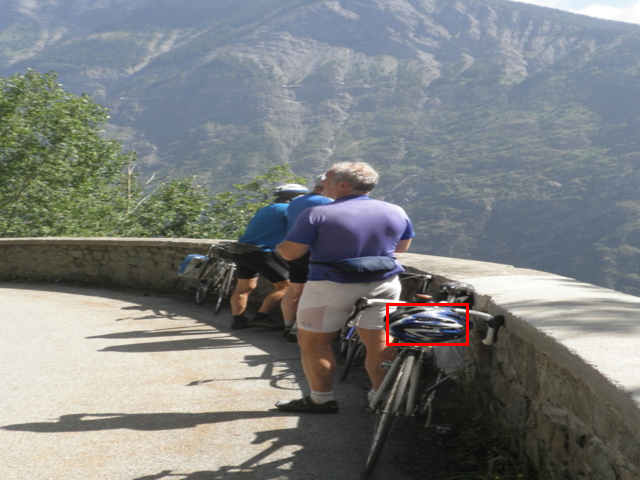

In [13]:
import os.path
from PIL import Image, ImageDraw

filename = os.path.join('bbox_train', img_ids[1]+".jpg")
print(filename)

img = Image.open(filename).resize((640,480))
width, height = img.size

# Get bbox (values are normalized)
XMin, XMax, YMin, YMax = bboxes.loc[bboxes['ImageID'] == img_ids[1]][['XMin','XMax','YMin','YMax']].to_numpy()[0].astype(float)

# Draw box
draw = ImageDraw.Draw(img)
draw.rectangle((XMin*width, YMin*height, XMax*width, YMax*height), outline='red', width=3)

# Show image
img

In [14]:
# Same as in https://storage.googleapis.com/openimages/2018_04/bbox_labels_600_hierarchy_visualizer/circle.html
bu.find_parents('/m/03p3bw')

[[None, 'Building', 'Sports equipment', 'Helmet'],
 [None, 'Clothing', 'Helmet'],
 [None, 'Sports equipment', 'Helmet']]

In [15]:
# All types of relationships available between two entities
bu.triplets_df

,Code1,Code2,Relationship
0,/m/03bt1vf,/m/02wzbmj,is
1,/m/01y9k5,/m/083vt,is
2,/m/04yx4,/m/0jyfg,wears
3,/m/02p5f1q,/m/02vqfm,contain
4,/m/02p5f1q,/m/07clx,contain
...,...,...,...
1461,/m/04kkgm,/m/015x4r,contain
1462,/m/04kkgm,/m/027pcv,contain
1463,/m/04yx4,/m/01f91_,eat
1464,/m/05r655,/m/0gm28,eat


In [16]:
# List relationships containing 'Bicycle helmet' ('/m/03p3bw')
bu.find_relationships('/m/03p3bw')

,Code1,Code2,Relationship
97,/m/03bt1vf,/m/03p3bw,wears
132,/m/05r655,/m/03p3bw,wears
679,/m/05r655,/m/03p3bw,holds
1052,/m/04yx4,/m/03p3bw,wears
1086,/m/01bl7v,/m/03p3bw,wears
1305,/m/01bl7v,/m/03p3bw,holds
1338,/m/04yx4,/m/03p3bw,holds
1422,/m/03bt1vf,/m/03p3bw,holds


In [18]:
bu.search_by_name("Man")

,Code,Label
14,/m/014sv8,Human eye
17,/m/0152hh,Snowman
20,/m/015h_t,Human beard
147,/m/0283dt1,Human mouth
176,/m/02p0tk3,Human body
213,/m/031n1,Human foot
220,/m/035r7c,Human leg
223,/m/039xj_,Human ear
227,/m/03bt1vf,Woman
252,/m/03q69,Human hair


In [19]:
# Show relationship annotations with 'Bicycle Helmet' ('/m/03p3bw') and 'Man' ('/m/04yx4')
# It will return a dataset only with the matching rows
vrds = bu.get_relationships("train", ['/m/03p3bw', '/m/04yx4'])
vrds

oidv6-train-annotations-vrd.csv saved!
Searching for ['/m/03p3bw', '/m/04yx4']...


,ImageID,LabelName1,LabelName2,XMin1,XMax1,YMin1,YMax1,XMin2,XMax2,YMin2,YMax2,RelationshipLabel
0,0bb12a9814f54b16,/m/04yx4,/m/03p3bw,0.423125,0.511250,0.195833,0.465833,0.442500,0.471875,0.195833,0.243333,wears
1,19633c10413ae15a,/m/04yx4,/m/03p3bw,0.248750,0.305000,0.390833,0.526667,0.260000,0.282500,0.386667,0.405000,wears
2,488e32b2eb37f131,/m/04yx4,/m/03p3bw,0.057223,0.196998,0.482500,0.660625,0.058161,0.171670,0.484375,0.544375,wears
3,5a5f9846b2f98c28,/m/04yx4,/m/03p3bw,0.088180,0.561914,0.061250,0.679375,0.233583,0.342402,0.057500,0.135000,wears
4,5a5f9846b2f98c28,/m/04yx4,/m/03p3bw,0.528143,0.848030,0.248125,0.855625,0.619137,0.738274,0.252500,0.304375,wears
...,...,...,...,...,...,...,...,...,...,...,...,...
1917,c030e20b320b34ee,/m/04yx4,/m/03p3bw,0.053333,0.891429,0.100000,1.000000,0.454603,0.699048,0.058095,0.499048,wears
1918,d03197cf877caf9e,/m/04yx4,/m/03p3bw,0.255000,0.608125,0.085366,0.847092,0.250625,0.398750,0.093809,0.251407,wears
1919,fabb872c83a50f27,/m/04yx4,/m/03p3bw,0.342773,0.411133,0.429688,0.565104,0.373047,0.400391,0.423177,0.454427,wears
1920,fabb872c83a50f27,/m/04yx4,/m/03p3bw,0.342773,0.411133,0.429688,0.565104,0.380859,0.395508,0.424479,0.449219,wears


In [20]:
bu.get_unique_img_ids(vrds).shape[0]

926